## <center><a><span style="color:blue">`Evaluating GIT` - Robustness Benchmarking</span></a></center>

#### Objective

The primary aim of this notebook is to conduct a detailed **robustness benchmarking** of the **GIT clustering algorithm**. Through a series of experiments, we assess how the GIT algorithm performs under various conditions, including **changes in data density**, **presence of noise**, and the **complexity of data distribution shapes**. We aim to understand the limits of GIT's adaptability, its sensitivity to hyperparameters, and its overall robustness in clustering diverse datasets.

This benchmarking will be carried out using a wide array of toy datasets specifically designed to challenge clustering algorithms. These datasets include, but are not limited to, simple geometric shapes, overlapping distributions, datasets with varying degrees of noise, and those with non-convex clusters. **By analyzing GIT's performance across these datasets, we intend to uncover its strengths and weaknesses, providing insights into its practical applications and guiding users on how to best leverage this algorithm in real-world scenarios.**

#### Install the `GIT package` ( Install this if needed )

In [1]:
# !pip install -i "https://test.pypi.org/simple/" git_cluster > /dev/null 

#### Import the Libraries

In [12]:
# General imports
import warnings ; warnings.filterwarnings('ignore')
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time


# GIT Clustring Algo & utils
from utils import alignPredictedWithTrueLabels, measures_calculator, autoPlot
from dataloaders import Real_DataLoader as Real_DataLoader
from dataloaders import Toy_DataLoader as Toy_DataLoader
from git_cluster import GIT


# Sklearn imports
from sklearn.datasets import make_blobs

# Jupyter Notebook specific imports
from tqdm.notebook import tqdm


# Local Data Path
real_datasets_path = "../../datasets/real_datasets"
toy_datasets_path = "../../datasets/toy_datasets"

# # Google Colab Data Path
# real_datasets_path = "/content/datasets/real_datasets"

### <center><a><span style="color:green">`Experiment 1` - Noise Impact on GIT Clustering</span></a></center>

This experiment assesses the GIT algorithm's robustness against noise in the chainlink dataset. By incrementally adding noise, we aim to understand GIT's performance degradation threshold. The dataset will undergo three noise variations: low, medium, and high, to observe changes in key metrics like F1 score and Adjusted Rand Index (ARI). This exploration will reveal GIT's capability to maintain data pattern recognition amidst increasing disturbances, offering insights into its practical applicability in noisy environments.

In [8]:
# X_raw, Y_raw = Real_DataLoader(name='chainlink', path=real_datasets_path).load()
# X = X_raw
# Y_true = Y_raw - 1
# autoPlot(X ,Y_true)

### <center><a><span style="color:green">`Experiment 2` - Clustering the `Impossible` Dataset with GIT</span></a></center>

This experiment navigates the complexities of the "impossible" dataset, known for its challenging clustering landscape. We deploy the GIT algorithm to uncover its capacity for delineating intricate cluster structures that conventional methods struggle with. The "impossible" dataset, characterized by its overlapping clusters and non-linear separability, tests GIT's adaptability and precision.

By evaluating GIT's performance across metrics like F1 score, ARI, and NMI, we aim to highlight its effectiveness in identifying nuanced patterns and managing datasets where traditional clustering algorithms falter. This exploration will provide deeper insights into GIT's algorithmic strengths and potential areas for optimization in handling complex data configurations.

### Load the Impossible data

In [15]:
# Load the Impossible Dataset
X_impossible, Y_impossible_true = Toy_DataLoader(name='impossible', path=toy_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_impossible_true))
num_features = len(X_impossible[0])
total_rows = len(X_impossible)

# Calculate the balance rate
class_counts = Counter(Y_impossible_true)
smallest_class_proportion = min(class_counts.values()) / total_rows

# Print out the dataset characteristics including the balance rate
print(f"The 'Impossible' Dataset has: {num_clusters} Classes, {num_features} Dimensions, {total_rows} Samples, and a Balance Rate of {smallest_class_proportion:.2f} per Class.")

The 'Impossible' Dataset has: 7 Classes, 2 Dimensions, 3595 Samples, and a Balance Rate of 0.08 per Class.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

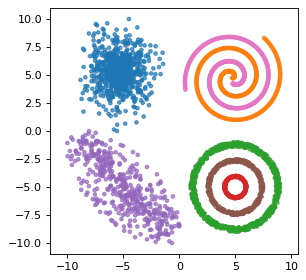

In [34]:
# Create an instance of the GIT clustering
git = GIT(k=9, target_ratio=[2, 1, 1, 1, 1, 1, 1])

# Fit the GIT model to the dataset and predict cluster labels.
Y_impossible_git_pred = git.fit_predict(X_impossible)

# Align the predicted labels with the true labels for accurate evaluation
Y_impossible_git_pred, Y_impossible_true = alignPredictedWithTrueLabels(Y_impossible_git_pred, Y_impossible_true)

# Plot the clusters
autoPlot(X_impossible, Y_impossible_git_pred)

### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [71]:
import hdbscan

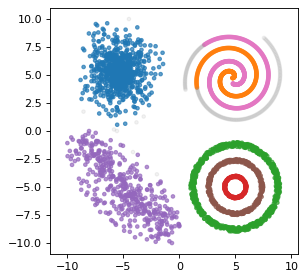

In [72]:
# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=100, 
                          min_samples=10)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_impossible)

# Get the predicted Clusters
Y_impossible_hdb_pred = hdbscan.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_impossible_hdb_pred, Y_impossible_true = alignPredictedWithTrueLabels(Y_impossible_hdb_pred, Y_impossible_true)

# Plot the clusters and summarize their statistics in a DataFrame
autoPlot(X_impossible, Y_impossible_hdb_pred)

### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [73]:
from sklearn.cluster import SpectralClustering

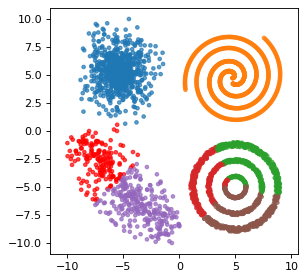

In [75]:
# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=7, assign_labels="discretize", 
                                         random_state=0, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_impossible)

# Get the predicted Clusters
Y_impossible_hdbspeclust_pred = spectral_clustering.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_impossible_hdbspeclust_pred, Y_impossible_true = alignPredictedWithTrueLabels(Y_impossible_hdbspeclust_pred, Y_impossible_true)

# Plot the clusters and summarize their statistics in a DataFrame
autoPlot(X_impossible, Y_impossible_hdbspeclust_pred)

### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [76]:
from sklearn.cluster import KMeans

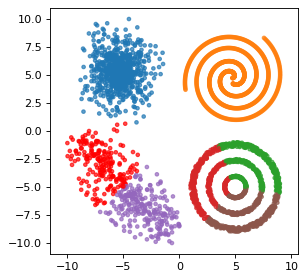

In [78]:
# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=7, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_impossible)

# Get the predicted Clusters
Y_impossible_kmeans_pred = kmeans.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_impossible_kmeans_pred, Y_impossible_true = alignPredictedWithTrueLabels(Y_impossible_kmeans_pred, Y_impossible_true)

# Plot the clusters and summarize their statistics in a DataFrame
autoPlot(X_impossible, Y_impossible_kmeans_pred)

### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [84]:
from sklearn.cluster import DBSCAN

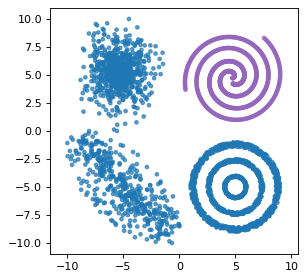

In [100]:
# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=2, min_samples=10)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_impossible_db_pred = dbscan.fit_predict(X_impossible)

# Get the predicted Clusters
Y_impossible_db_pred = dbscan.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_impossible_db_pred, Y_impossible_true = alignPredictedWithTrueLabels(Y_impossible_db_pred, Y_impossible_true)

# Plot the clusters and summarize their statistics in a DataFrame
autoPlot(X_impossible, Y_impossible_db_pred)